## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

In [2]:
# ultralytics의 버전을 최신 버전으로 설치
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
# 내 컴퓨터의 nvidia 그래픽 드라이버 정보 확인
!nvidia-smi

Fri Aug  8 09:59:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        Off |   00000000:41:00.0  On |                  Off |
| 57%   49C    P2             61W /  450W |    2075MiB /  24564MiB |     10%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

## Install YOLO11 via Ultralytics

In [2]:
# %pip install "ultralytics<=8.3.40" supervision roboflow
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()  # ultralytics의 버전을 체크

Ultralytics 8.3.174 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 23994MiB)
Setup complete ✅ (32 CPUs, 251.5 GB RAM, 1423.0/1875.7 GB disk)


## Fine-tune YOLO11 on custom dataset

In [4]:
import os
# 현재 작업 디렉토리 HOME으로 지정
HOME = os.getcwd()
print(HOME)

/home/park/datasets


In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# from google.colab import userdata
# from roboflow import Roboflow

# !curl -L "https://public.roboflow.com/ds/hDSSsXVi0C?key=aDIR2OQIZs" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

# ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
# rf = Roboflow(api_key=ROBOFLOW_API_KEY)

# workspace = rf.workspace("liangdianzhong")
# project = workspace.project("-qvdww")
# version = project.version(3)
# dataset = version.download("yolov11")

/content/datasets


In [7]:
!pwd

/content/datasets


In [ ]:
# prompt: 구글드라이브 링크 주소로 colab enterprise에서 다운로드 하는 코드를 생성

!gdown --id "1jB0xe967eBWEHFgdsWbLkWnlxmQjj_j_" -O /content/datasets/all_combined.zip


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1jB0xe967eBWEHFgdsWbLkWnlxmQjj_j_
From (redirected): https://drive.google.com/uc?id=1jB0xe967eBWEHFgdsWbLkWnlxmQjj_j_&confirm=t&uuid=a2ab5c80-a2dd-4708-bdc8-432332e4762d
To: /content/datasets/all_combined.zip
100% 2.16G/2.16G [00:27<00:00, 78.5MB/s]


In [8]:
!unzip -qq /content/drive/MyDrive/미니프로젝트/all_combined.zip -d /content/datasets/all_combined

## Custom Training

In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data=/home/park/datasets/all_combined/data.yaml epochs=120 imgsz=640 plots=True cache=True

/home/park/datasets
New https://pypi.org/project/ultralytics/8.3.176 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.174 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 23994MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/park/datasets/all_combined/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=120, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=tr

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml			 labels_correlogram.jpg  val_batch0_labels.jpg
BoxF1_curve.png			 labels.jpg		 val_batch0_pred.jpg
BoxP_curve.png			 results.csv		 val_batch1_labels.jpg
BoxPR_curve.png			 results.png		 val_batch1_pred.jpg
BoxR_curve.png			 train_batch0.jpg	 val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch1.jpg	 val_batch2_pred.jpg
confusion_matrix.png		 train_batch2.jpg	 weights


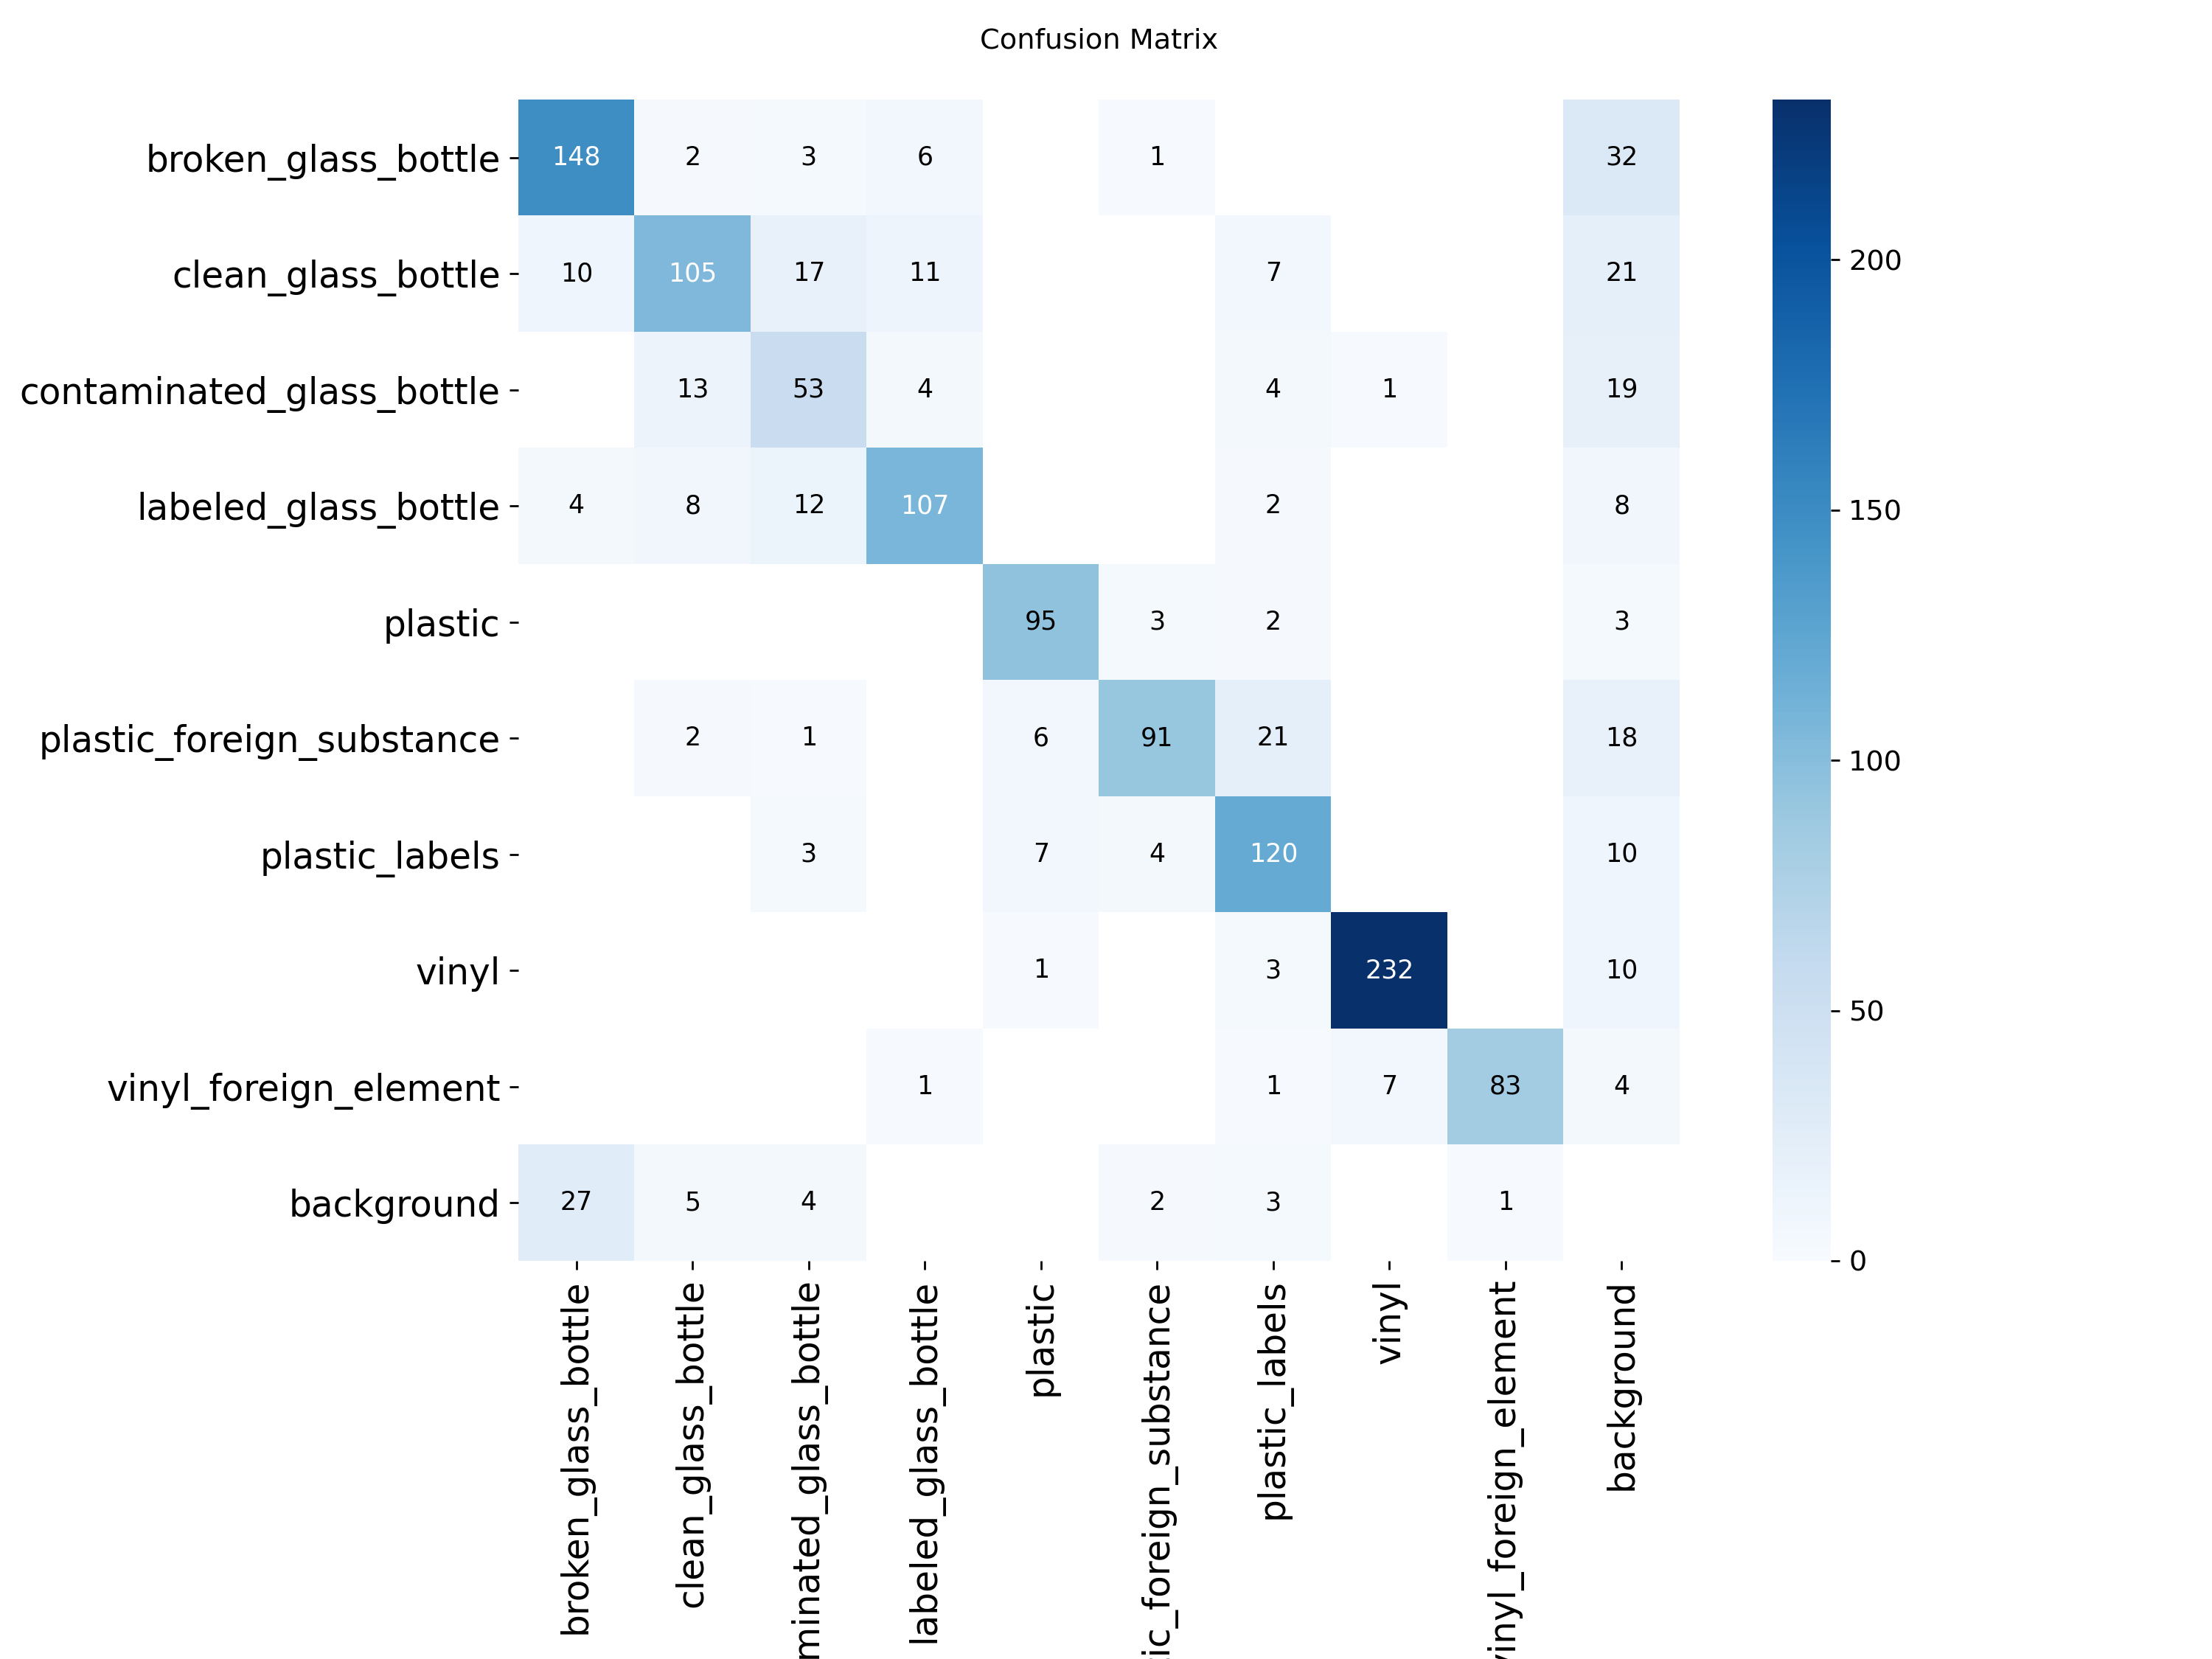

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train15/confusion_matrix.png', width=600)

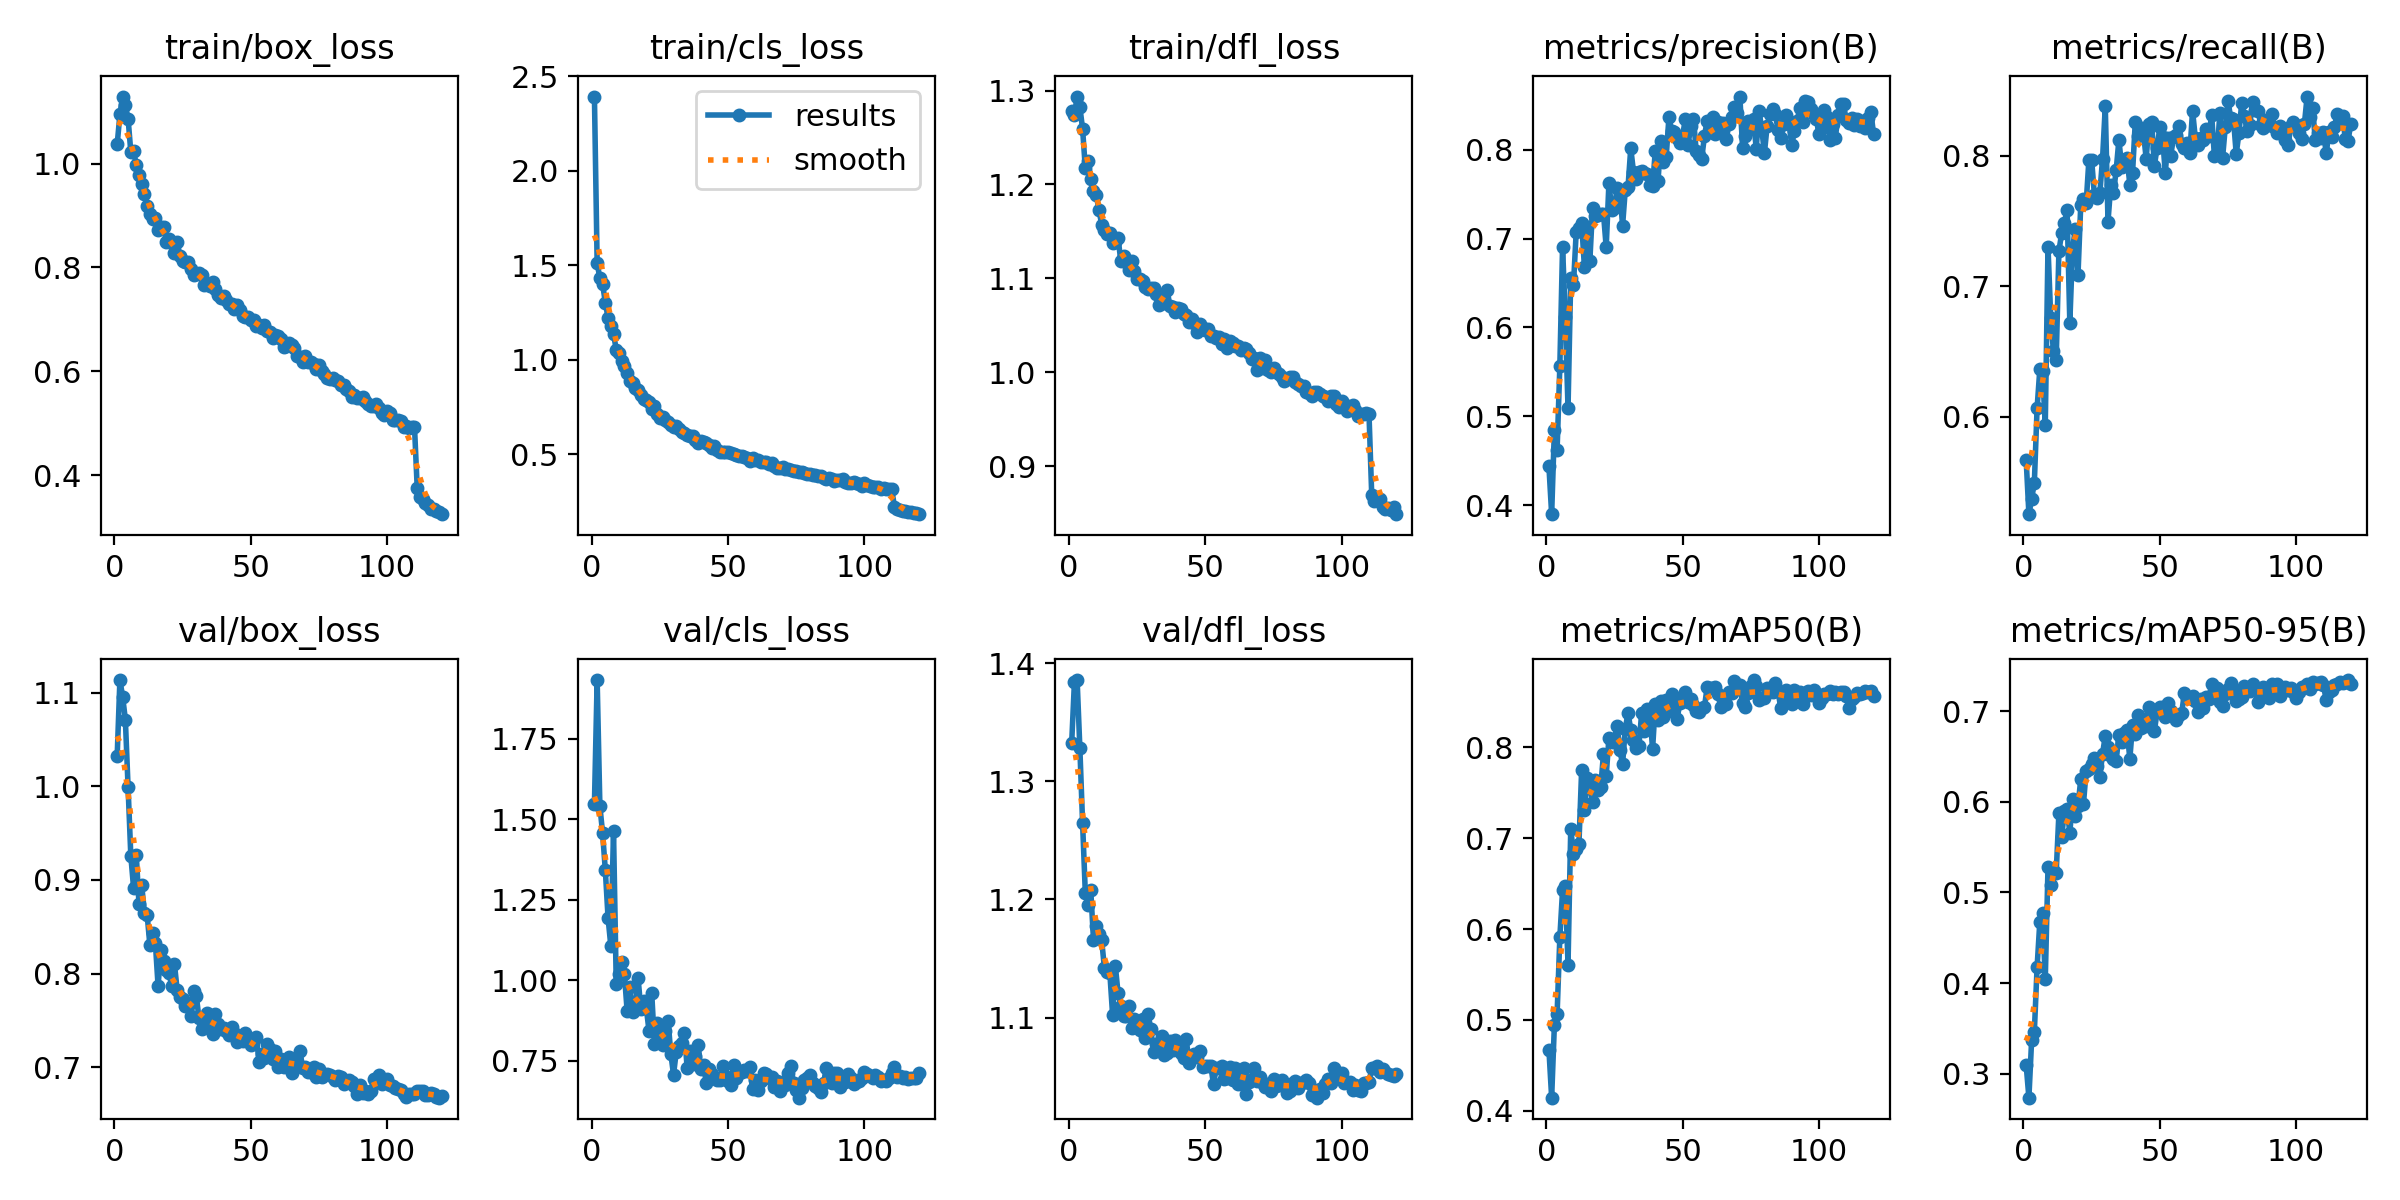

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train15/results.png', width=600)

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

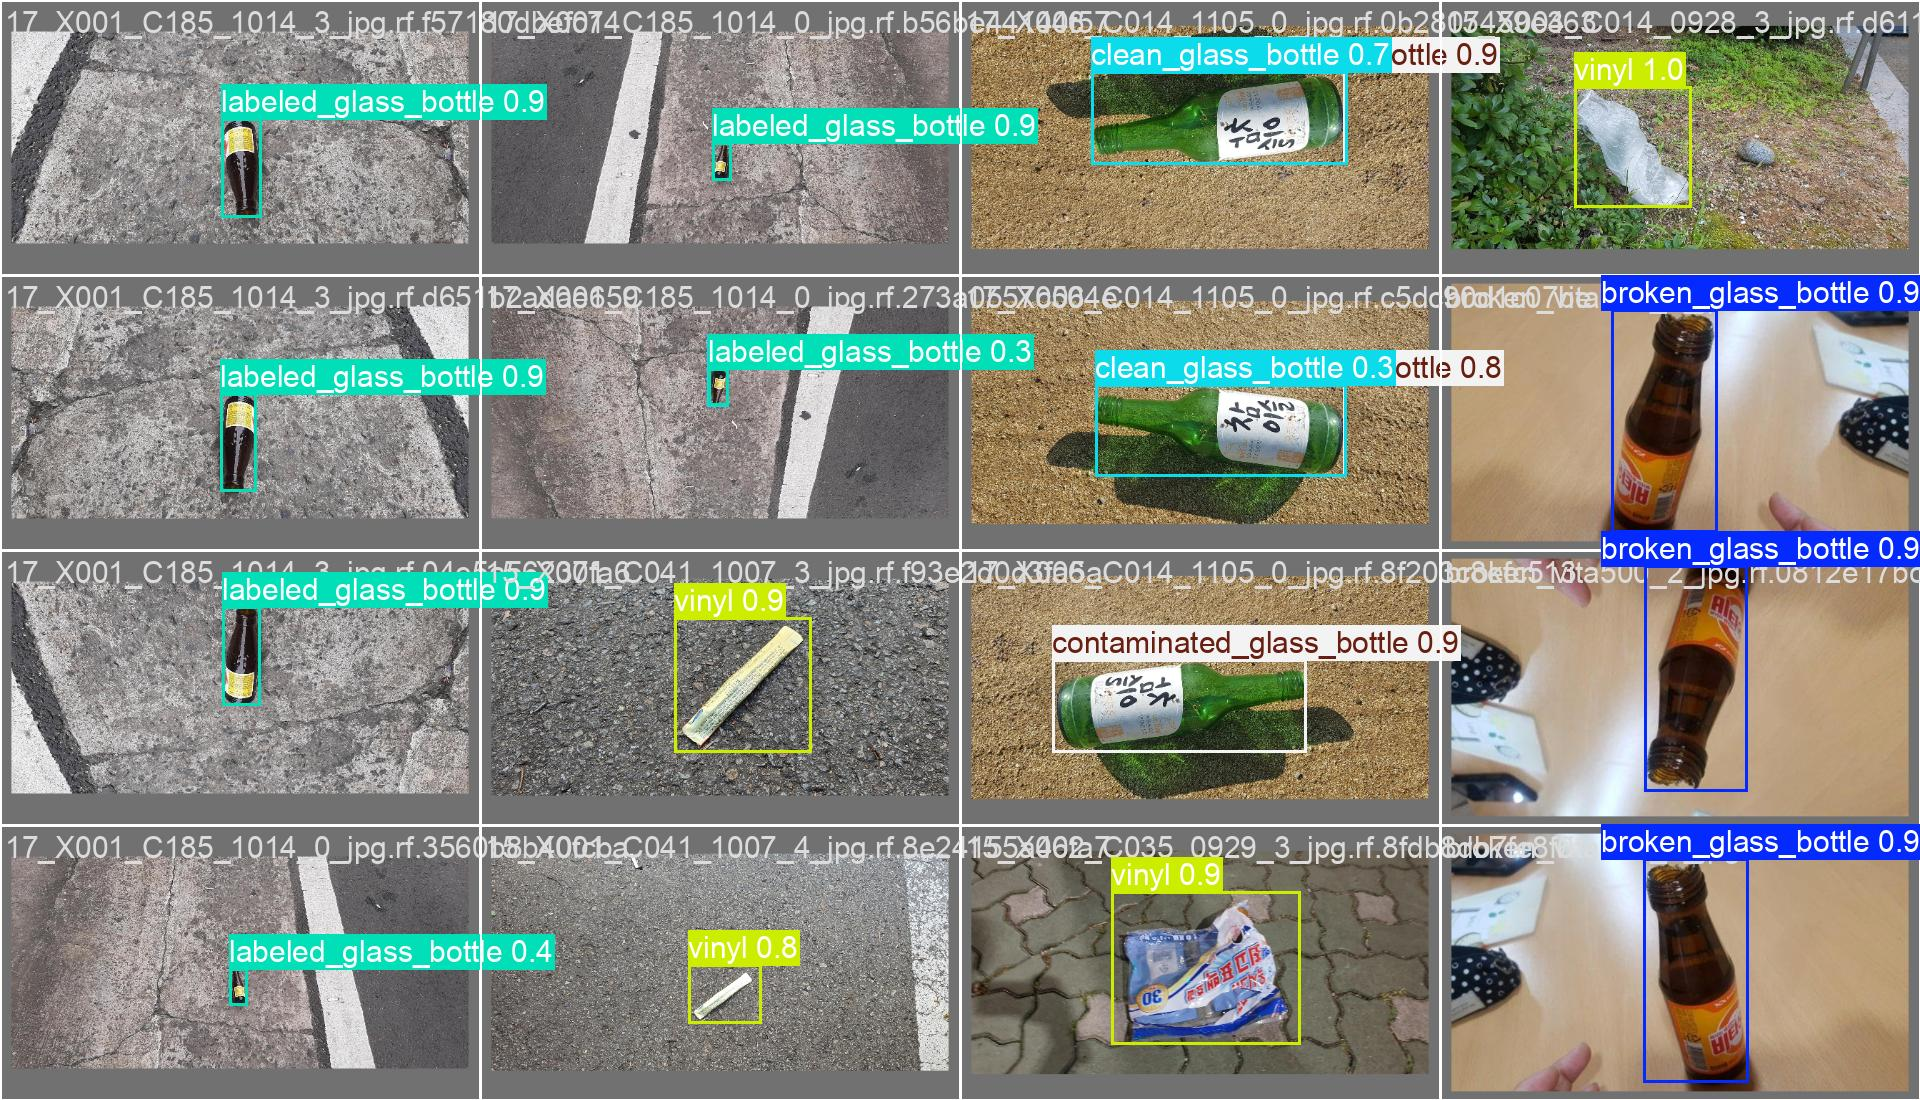

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train15/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [13]:
!yolo task=detect mode=val model={HOME}/runs/detect/train15/weights/best.pt data=/home/park/datasets/all_combined/data.yaml

Ultralytics 8.3.174 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 23994MiB)
YOLO11s summary (fused): 100 layers, 9,416,283 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2843.3±997.7 MB/s, size: 321.0 KB)
val: Scanning /home/park/datasets/all_combined/valid/labels.cache... 1096 images
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 15, len(boxes) = 1243. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1096       1243       0.84      0.815      0.863      0.734
   broken_glass_bottle         87        189      0.875      0.667      0.815      0.561
    clean_glass_bottle        126        135      0.719      0.778      0.818      0.687
contaminated_glass_bottle       

In [16]:
!yolo task=detect mode=test model={HOME}/runs/detect/train15/weights/best.pt data=/home/park/datasets/all_combined/data.yaml

Traceback (most recent call last):
  File "/home/park/miniconda3/envs/yolov11/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/home/park/miniconda3/envs/yolov11/lib/python3.11/site-packages/ultralytics/cfg/__init__.py", line 918, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {list(MODES)}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=test'. Valid modes are ['train', 'val', 'predict', 'export', 'benchmark', 'track'].

    Arguments received: ['yolo', 'task=detect', 'mode=test', 'model=/home/park/datasets/runs/detect/train15/weights/best.pt', 'data=/home/park/datasets/all_combined/data.yaml']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['obb', 'classify', 'segment', 'pose', 'detect']
                MODE (required) is one of ['train', 'val', 'predict', 'export', 'benchmark', 'track']
                ARGS (optional) are any number of c

## Inference with custom model

In [17]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train15/weights/best.pt conf=0.25 source=/home/park/datasets/all_combined/test/images/1-broken_glass_bottle_jpg.rf.62e7ea9f50b0a126863f4c6a0653977f.jpg save=True

Ultralytics 8.3.174 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 23994MiB)
YOLO11s summary (fused): 100 layers, 9,416,283 parameters, 0 gradients, 21.3 GFLOPs

image 1/1 /home/park/datasets/all_combined/test/images/1-broken_glass_bottle_jpg.rf.62e7ea9f50b0a126863f4c6a0653977f.jpg: 640x640 3 broken_glass_bottles, 5.6ms
Speed: 5.3ms preprocess, 5.6ms inference, 92.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


**NOTE:** Let's take a look at few results.

In [ ]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")